# 專題分析 - MNIST

In [1]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# 第一次執行會下載到 '~/.keras/datasets/'
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 預處理
X_train = X_train.reshape(X_train.shape[0], -1) / 255 
X_test = X_test.reshape(X_test.shape[0], -1) / 255
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


# 複雜的模型設計

In [5]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 321us/step - loss: 0.3291 - acc: 0.9079 - val_loss: 0.1373 - val_acc: 0.9607
Epoch 2/10
48000/48000 [==============================] - 15s 310us/step - loss: 0.1123 - acc: 0.9670 - val_loss: 0.0974 - val_acc: 0.9708
Epoch 3/10
48000/48000 [==============================] - 15s 312us/step - loss: 0.0707 - acc: 0.9789 - val_loss: 0.0872 - val_acc: 0.9754
Epoch 4/10
48000/48000 [==============================] - 17s 350us/step - loss: 0.0459 - acc: 0.9866 - val_loss: 0.0854 - val_acc: 0.9732
Epoch 5/10
48000/48000 [==============================] - 16s 330us/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0786 - val_acc: 0.9764
Epoch 6/10
48000/48000 [==============================] - 17s 345us/step - loss: 0.0254 - acc: 0.9926 - val_loss: 0.0848 - val_acc: 0.9753
Epoch 7/10
48000/48000 [==============================] - 16s 340us/step - loss: 0.0155 - acc: 0.9957 - val_loss: 0.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

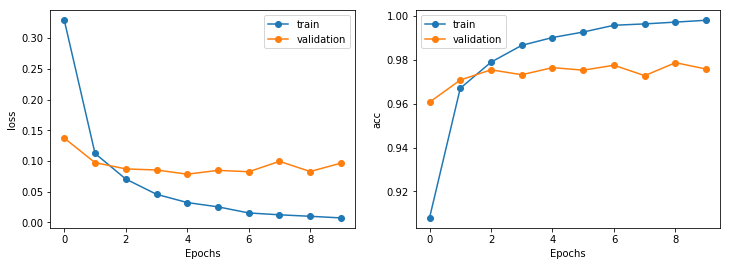

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [9]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 216us/step


[0.086779636649067834, 0.97640000000000005]

# Early Stopping

In [10]:
from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor='val_loss', patience=1) 
#patience:number of epochs with no improvement after which training will be stopped.

In [ ]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1, callbacks=[earlyStopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 313us/step - loss: 0.3204 - acc: 0.9117 - val_loss: 0.1464 - val_acc: 0.9572
Epoch 2/10
48000/48000 [==============================] - 15s 309us/step - loss: 0.1149 - acc: 0.9657 - val_loss: 0.1027 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 15s 305us/step - loss: 0.0692 - acc: 0.9788 - val_loss: 0.0863 - val_acc: 0.9741
Epoch 4/10
47800/48000 [============================>.] - ETA: 0s - loss: 0.0480 - acc: 0.9857

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [ ]:
model.evaluate(X_test,y_test)

# Regularization

In [ ]:
from keras import regularizers

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(100, activation='relu', kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [ ]:
model.evaluate(X_test,y_test,batch_size=100)

# Dropout

In [ ]:
from keras.layers import Dropout  

model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [ ]:
model.evaluate(X_test,y_test)